# Titile: DNA Distance Analysis
- Research from Fu-Chi Yang

In [1]:
import time
import sys
import random
from statistics import mean
import pandas as pd
import utils_final
# sys.path.append('/home/cptsai/catkin_ws/src/fuchi_research_1019/ipynb')

# Ch0: Term Definition

- *fullName*: 
    - The name of each individual, ex: **EUL203**
- *race*
    - 3 different races, which is: **[black/white/yellow]**
- *class*
    - 35 different classes, which is **[EU, KC, TSO, P, RUK, ...]**
- *subpop*
    - 15 different subpop, which is:
        - **black**
        - **white**
        - yellow: **TSO, HAN, AMI, ...**

# Ch1: Data-Preprocessing
- initially, we need to read the raw data into the program
- then we can sort the neighbors of each individual by the distance value
- then we can use Pandas to handle the data process

In [2]:
# >>> read data by pandas
df_all = pd.read_csv('data_list_nxn_table.csv', delimiter=',')

In [3]:
# >>> choose a sub-section for your whole data-set
df = df_all
# df = df_all.iloc[0:1600,0:200]
# df = df_all.iloc[:,:]
# df.head()
# df = df_all.iloc[:,0:6]
# access the element by iloc
# df.iloc[0:5,:]
# df
# df.shape[1]
# df.iloc[0,2]

# Ch2 KNN (K-Nearest-Neighbor) 
- after the initial data pre-processing, we can start **KNN** to see the relation between distance and DNA class
- pick a K value, and assign the prediction of the individual as the most common class among the neighbors


In [4]:
# ---- start KNN -----
K = 1
[original_race_array_KNN, predicted_race_array_KNN] = utils_final.k_nearest_neighbor(df, K)

Current Progress:  99.97 %


In [ ]:
# original_race_array_KNN[:]

In [ ]:
# predicted_race_array_KNN[:]

In [5]:
# >>> 個別種族的正確率EX.[han, thana, han_ko ...]

# >>> old code
# [lst_correct_percent, lst_correct, lst_total] = utils_final.analyze_individual_race_accuracy(original_race_array_KNN, predicted_race_array_KNN)

# >>> new code
[Y2Y_accuracy, Y2W_accuracy, Y2B_accuracy, W2Y_accuracy, W2W_accuracy, W2B_accuracy, B2Y_accuracy, B2W_accuracy, B2B_accuracy] = utils_final.analyze_individual_race_accuracy(original_race_array_KNN, predicted_race_array_KNN)

print("\n [Correct] Y2Y_accuracy: ", Y2Y_accuracy)
print("\n [Wrong  ] Y2W_accuracy: ", Y2W_accuracy)
print("\n [Wrong  ] Y2B_accuracy: ", Y2B_accuracy)
print("\n [Wrong  ] W2Y_accuracy: ", W2Y_accuracy)
print("\n [Correct] W2W_accuracy: ", W2W_accuracy)
print("\n [Wrong  ] W2B_accuracy: ", W2B_accuracy)
print("\n [Wrong  ] B2Y_accuracy: ", B2Y_accuracy)
print("\n [Wrong  ] B2W_accuracy: ", B2W_accuracy)
print("\n [Correct] B2B_accuracy: ", B2B_accuracy)


 [Correct] Y2Y_accuracy:  0.9874371859296482

 [Wrong  ] Y2W_accuracy:  0.011306532663316583

 [Wrong  ] Y2B_accuracy:  0.001256281407035176

 [Wrong  ] W2Y_accuracy:  0.020795660036166366

 [Correct] W2W_accuracy:  0.9755877034358047

 [Wrong  ] W2B_accuracy:  0.003616636528028933

 [Wrong  ] B2Y_accuracy:  0.03208556149732621

 [Wrong  ] B2W_accuracy:  0.0106951871657754

 [Correct] B2B_accuracy:  0.9572192513368984


**[Note]**: From above, we can know that when K=1, the race accuracy is higher than 95%.

In [6]:
# letʼs check the similarity of the two lists (Ex. han=thana=han_ko)
accuracy = utils_final.getAccuracyOfTwoLists(original_race_array_KNN, predicted_race_array_KNN)
print("accuracy: ", accuracy)

accuracy:  0.9794921875


**[Note]**: From above, we know that we can get pretty good prediction simply by KNN (when K = 1), let's change the K-value and see the results.  
In short, 
- In the above, we set K as a constant.
- In the KNN problem, the value of K is important, since different dataset needs an optimal K.
- So, letʼs set K as a variable, and execute KNN again, and find out what is the besk K value. 

In [ ]:
# write to file 
# file = open("knn_result.csv", "w") # open file
# file.write("Index,Population,Correct,Total,Accuracy\n") # print title

In [12]:
# ---- start KNN with variable K -----
k_range = 40
k_array = []
accuracy_array = []
for k in range(1, k_range):
    k_array.append(k)
    
    [original_race_array, predicted_race_array] = utils_final.k_nearest_neighbor(df, k)
    accuracy = utils_final.getAccuracyOfTwoLists(original_race_array, predicted_race_array)
    accuracy_array.append(accuracy)
    print("k: ", k, ", accuracy: ", accuracy)
    
    # write to file ...
    # file.write("----k = ")
    # file.write(str(k))
    # file.write("----\n")
    # [lst_correct_percent, lst_correct, lst_total] = utils.analyze_individual_class_accuracy(original_class_array, predicted_class_array)
    # print the content ...
    # utils.write2file(file, lst_correct_percent, lst_correct, lst_total)

# file.close() # close file

Current Progress:  99.97 %
k:  39 , accuracy:  0.9176432291666666


In [16]:
# aaa = []
# aaa.append(1)
# aaa.append(2)
# aaa.append(3)

# print(aaa)

[1, 2, 3]


[0.9794921875, 0.9710286458333334, 0.9733072916666666, 0.9684244791666666, 0.9671223958333334, 0.9638671875, 0.9622395833333334, 0.9580078125, 0.9563802083333334, 0.9521484375, 0.9518229166666666, 0.9501953125, 0.9475911458333334, 0.9453125, 0.9417317708333334, 0.939453125, 0.9378255208333334, 0.935546875, 0.9345703125, 0.9342447916666666, 0.93359375, 0.9313151041666666, 0.9309895833333334, 0.9290364583333334, 0.9287109375, 0.9280598958333334, 0.9264322916666666, 0.9270833333333334, 0.9267578125, 0.9264322916666666, 0.9267578125, 0.9251302083333334, 0.9241536458333334, 0.9231770833333334, 0.9228515625, 0.9215494791666666, 0.9202473958333334, 0.9182942708333334, 0.9176432291666666]


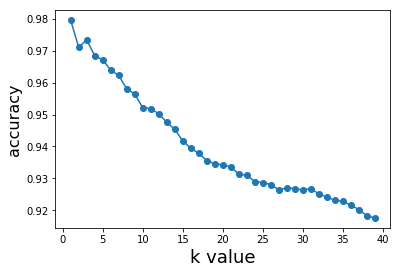

In [13]:
# letʼs show the result with a plot
print(accuracy_array)
utils_final.plot_k_vs_accuracy(k_array, accuracy_array)


In [ ]:
### ------------ To be continue----------

# Distance Weighted Clustering
In this section, we try to cluster the race (YWB) and subpopulation by Distance Weighted Clustering. 


We train for an optimal distance (d*) based on our algorithm, then get the weighted prediction

## Distance Training
In this section, we have to train for our d*.

In [ ]:
d_star_array = []
d_star = 0
d_star_init = 0.001;
d_star_gap  = 0.0003;
min_d_to_perfect = 1000000;
for j in range(5): 
    print("d_star_init:", d_star_init)
    d_to_perfect = utils3.distance_threshold_clustering(df, d_star_init);
    print("d_to_perfect:", d_to_perfect)
    
    # update your d*
    if (d_to_perfect < min_d_to_perfect):
        print("d* has been updated ...")
        min_d_to_perfect = d_to_perfect
        d_star = d_star_init
    d_star_init = d_star_init + d_star_gap
d_star_array.append(d_star)
d_star = mean(d_star_array)
print("d* is", d_star)


## Execute Distance Weighted Clustering
From above, we get the optimal distance (d*). 
We can then run the algorithm for the unknown input.

In [ ]:
# get a random row as the unknown input
# (should read from file in the future)
random_num = random.randrange(0, df.shape[0])
unknown = df.iloc[random_num]

In [ ]:
predicted_race_list = utils3.predict_race(unknown, d_star)

In [ ]:
predicted_race_list

In [ ]:
predicted_class_list = utils3.predict_subpop(unknown, d_star)

In [ ]:
predicted_class_list

## KND (K-Nearest-Distance)
- Take a closer look to the raw data, we can observe that some of the distances are the same. 
- So instead of KNN, we can see what happens to KND (K-nearest-distance)
- In other words, pick "K" nearest distance, which includes more than (or equal to) K neighbors.
- Letʼs see what the result looks like.

In [ ]:
K = 1
[original_class_array_KND, predicted_class_array_KND] = utils.k_nearest_distance(df, K)
accuracy = utils.getAccuracyOfTwoLists(original_class_array_KND, predicted_class_array_KND)
print("K: ", K, ", accuracy: ", accuracy)

In [ ]:
[lst_correct_percent, lst_correct, lst_total] = utils.analyze_individual_class_accuracy(original_class_array_KND, predicted_class_array_KND)
print("\n lst_correct_percent:\n", lst_correct_percent)
print("\n lst_correct:\n", lst_correct)
print("\n lst_total:\n", lst_total)

In [ ]:
# letʼs see what the result looks like
print("original_class_array_KND: ", original_class_array_KND)
print("\n\n")
print("predicted_class_array_KND: ", predicted_class_array_KND)

In [ ]:
# letʼs check the similarity of the two lists
accuracy = utils.getAccuracyOfTwoLists(original_class_array_KND, predicted_class_array_KND)
print("accuracy: ", accuracy)


#### Letʼs check K value
- Again, just like what weʼve discussed above, we need to tune k value for this dataset.
- So letʼs use for-loop to automize the process and check the result. 

In [ ]:
# write to file 
file = open("knd_result.csv", "w") # open file
file.write("Index,Population,Correct,Total,Accuracy\n") # print title

In [ ]:
# ---- start KND with variable K -----
k_range = 10
k_array = []
accuracy_array = []
for k in range(1, k_range):
    k_array.append(k)
    
    [original_class_array, predicted_class_array] = utils.k_nearest_distance(df, k)
    
    accuracy = utils.getAccuracyOfTwoLists(original_class_array, predicted_class_array)
    accuracy_array.append(accuracy)
    print("k: ", k, ", accuracy: ", accuracy)
      
    # write to file ...
    file.write("----k = ")
    file.write(str(k))
    file.write("----\n")
    [lst_correct_percent, lst_correct, lst_total] = utils.analyze_individual_class_accuracy(original_class_array, predicted_class_array)
    # print the content ...
    utils.write2file(file, lst_correct_percent, lst_correct, lst_total)
    


file.close() # close file

In [ ]:
# letʼs show the result with a plot
utils.plot_k_vs_accuracy(k_array, accuracy_array)

# Use the distance information
- We havenʼt use any distance value information above.
- In this section, we can include this information in our prediction

### KWNN

In [ ]:
K = 1
[original_class_array_KWNN, predicted_class_array_KWNN] = utils.k_weighted_nearest_neighbor(df, K)
#accuracy = utils.getAccuracyOfTwoLists(original_class_array, predicted_class_array)
#print("K: ", K, ", accuracy: ", accuracy)

In [ ]:
#print(original_class_array_KWNN)

In [ ]:
print(predicted_class_array_KWNN)

In [ ]:
[lst_correct_percent, lst_correct, lst_total] = utils.analyze_individual_class_accuracy(original_class_array_KWNN, predicted_class_array_KWNN)
print("\n lst_correct_percent:\n", lst_correct_percent)
print("\n lst_correct:\n", lst_correct)
print("\n lst_total:\n", lst_total)

#### Tuning the K value
- Still, we need a for-loop to get the best K in our dataset

In [ ]:
# write to file 
file = open("kwnn_result.csv", "w") # open file
file.write("Index,Population,Correct,Total,Accuracy\n") # print title

In [ ]:
# ---- start KWNN with variable K -----
k_range = 15
k_array = []
accuracy_array = []
for k in range(1, k_range):
    k_array.append(k)
    
    [original_class_array, predicted_class_array] = utils.k_weighted_nearest_neighbor(df, k)
    
    # accuracy = utils.getAccuracyOfTwoLists(original_class_array, predicted_class_array)
    accuracy = utils.getGeneralAccuracyOfTwoLists(original_class_array, predicted_class_array)
    
    accuracy_array.append(accuracy)
    print("k: ", k, ", accuracy: ", accuracy)
    
    # write to file ...
    file.write("----k = ")
    file.write(str(k))
    file.write("----\n")
    [lst_correct_percent, lst_correct, lst_total] = utils.analyze_individual_class_accuracy(original_class_array, predicted_class_array)
    # print the content ...
    utils.write2file(file, lst_correct_percent, lst_correct, lst_total)
    


file.close() # close file

In [ ]:
# letʼs check the result
utils.plot_k_vs_accuracy(k_array, accuracy_array)

### KWND
Well, the (weighted+KNN) seems reasonable, letʼs try (weighted+KND) then.

In [ ]:
K = 5
[original_class_array, predicted_class_array] = utils.k_weighted_nearest_distance(df, K)
accuracy = utils.getAccuracyOfTwoLists(original_class_array, predicted_class_array)
print("K: ", K, ", accuracy: ", accuracy)

Again, tune the best K

In [ ]:
# write to file 
file = open("kwnd_result.csv", "w") # open file
file.write("Index,Population,Correct,Total,Accuracy\n") # print title

In [ ]:
# ---- start KWND with variable K -----
k_range = 15
k_array = []
accuracy_array = []
for k in range(1, k_range):
    k_array.append(k)
    
    [original_class_array, predicted_class_array] = utils.k_weighted_nearest_distance(df, k)
    
    # accuracy = utils.getAccuracyOfTwoLists(original_class_array, predicted_class_array)
    accuracy = utils.getGeneralAccuracyOfTwoLists(original_class_array, predicted_class_array)
    
    accuracy_array.append(accuracy)
    print("k: ", k, ", accuracy: ", accuracy)
    
    # write to file ...
    file.write("----k = ")
    file.write(str(k))
    file.write("----\n")
    [lst_correct_percent, lst_correct, lst_total] = utils.analyze_individual_class_accuracy(original_class_array, predicted_class_array)
    # print the content ...
    utils.write2file(file, lst_correct_percent, lst_correct, lst_total)
    


file.close() # close file

In [ ]:
# letʼs check the result
utils.plot_k_vs_accuracy(k_array, accuracy_array)

### Let's check the distance threshold
From above, we know that weighted distance seems reasonable, now instead of using k (since there is no way to optimize it), let's use distance as a threshold.

In [ ]:
# decide distance_threshold value (can use ML skill in the future, for now just tuning)
# we can use the "diagonal distance" as the standard 
distance_threshold = 0.005


In [ ]:
# apply the distance_threshold to the clustering algorithm
[original_class_array, predicted_class_array] = utils2.distance_threshold_clustering(df, distance_threshold)

In [ ]:
accuracy = utils.getAccuracyOfTwoLists(original_class_array, predicted_class_array)


In [ ]:
accuracy